In [150]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as mn

In [84]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df1 = train_df.copy()
df2 = train_df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
print("the shape {0} and size  {1} of the titanic ".format(df1.shape,df1.size))

the shape (891, 12) and size  10692 of the titanic 


In [87]:
print("missing Value{}".format(df1.isnull().sum()))

missing ValuePassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [88]:
df1.set_index("PassengerId",inplace =True)

In [89]:
df1.drop(columns = [ "Cabin" ],axis = 1,inplace = True)

In [91]:
print("Decrtibing a data l:")
df1.describe(include = "all")

Decrtibing a data l:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Fleming, Miss. Margaret",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [92]:
df1["Family"] = df1.Parch + df1. SibSp
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [93]:
grouping_survival  = df1.groupby(["Sex" , "Age"])["Survived"].sum()
grouping_survival

Sex     Age  
female  0.75     2
        1.00     2
        2.00     2
        3.00     1
        4.00     5
                ..
male    70.00    0
        70.50    0
        71.00    0
        74.00    0
        80.00    1
Name: Survived, Length: 145, dtype: int64

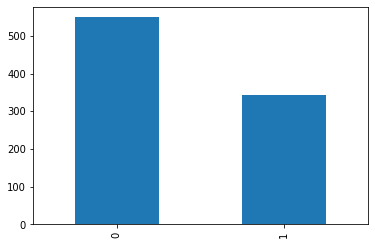

In [94]:
df1.Survived.value_counts().plot(kind = "bar")

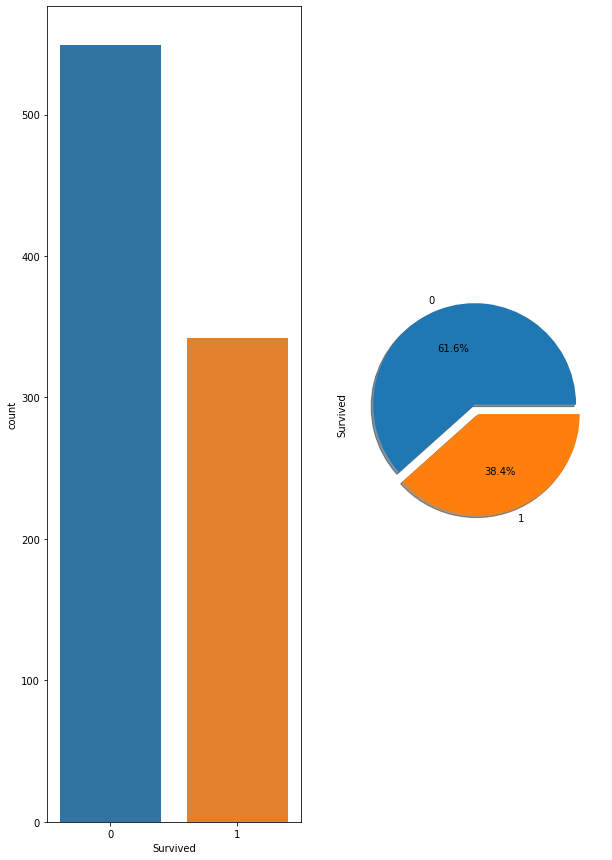

<Figure size 432x288 with 0 Axes>

In [95]:
fig,ax = plt.subplots(1,2,figsize = (10,15))
plt.figure()
sns.countplot(x="Survived" , data = df1,ax = ax[0])
df1.Survived.value_counts().plot.pie(explode = [0.1,0],shadow = True,autopct = "%1.1f%%", ax = ax[1])
plt.show()

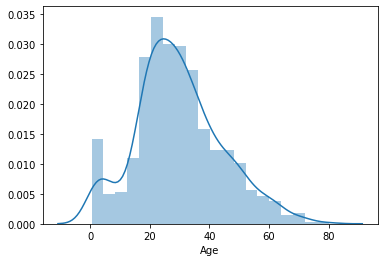

In [96]:
sns.distplot(df1.Age)

C:\Users\Karthick\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


TypeError: 'NoneType' object is not iterable

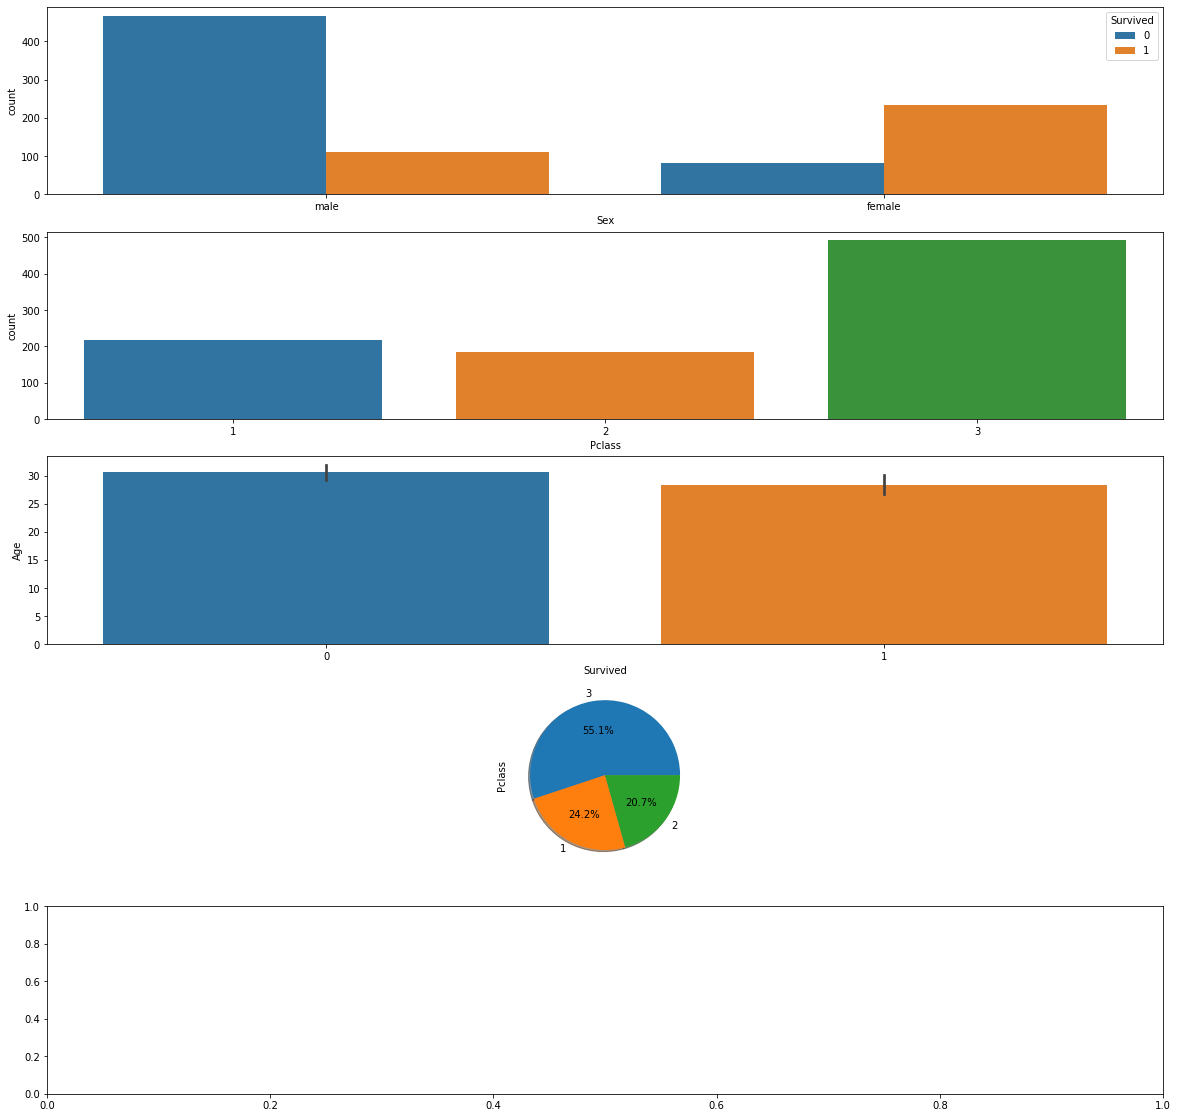

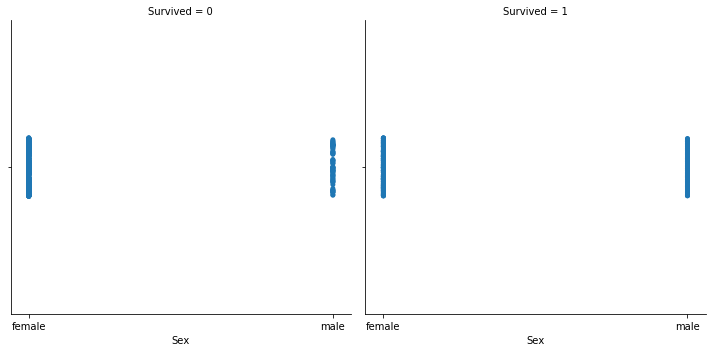

In [97]:
fig,ax = plt.subplots(5,1,figsize = (20,20))
sns.countplot(x = "Sex" ,data = df1, hue ="Survived" ,ax= ax[0])
sns.countplot(x = "Pclass" ,data = df1 , ax = ax[1])
sns.barplot(x ="Survived" ,y = "Age" ,data = df1,ax = ax[2])
df1.Pclass.value_counts().plot.pie(shadow = True ,autopct="%1.1f%%",ax=ax[3])
sns.catplot(x ="Sex" ,data = df1,hue = "Embarked" ,col = "Survived",ax = ax[4])

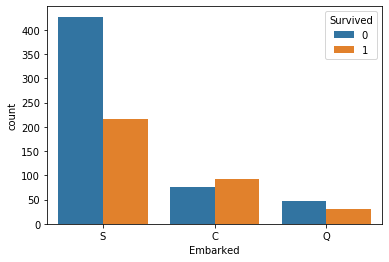

In [70]:
sns.countplot(x ="Embarked" ,hue = "Survived" ,data = df1)

In [98]:
grouping_pclass = df1.groupby(["Sex","Pclass"]).mean()
grouping_pclass

Survived        Age     SibSp     Parch        Fare    Family
Sex    Pclass                                                               
female 1       0.968085  34.611765  0.553191  0.457447  106.125798  1.010638
       2       0.921053  28.722973  0.486842  0.605263   21.970121  1.092105
       3       0.500000  21.750000  0.895833  0.798611   16.118810  1.694444
male   1       0.368852  41.281386  0.311475  0.278689   67.226127  0.590164
       2       0.157407  30.740707  0.342593  0.222222   19.741782  0.564815
       3       0.135447  26.507589  0.498559  0.224784   12.661633  0.723343

In [99]:
df1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
df1.Embarked = df1.Embarked.fillna("S")

In [102]:
df1.Age = df1.Age.fillna(df1.Age.mean())

In [103]:
catogorical = {"male":1 ,"female":0}
df1.Sex = df1.Sex.map(catogorical)

In [104]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Family      0
dtype: int64

In [106]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,S,1
2,1,1,0,38.0,1,0,C,1
3,1,3,0,26.0,0,0,S,0
4,1,1,0,35.0,1,0,S,1
5,0,3,1,35.0,0,0,S,0


In [105]:
df1.drop(columns = ["Name" ,"Fare","Ticket"],axis = 1,inplace = True)

In [107]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,S,1
2,1,1,0,38.0,1,0,C,1
3,1,3,0,26.0,0,0,S,0
4,1,1,0,35.0,1,0,S,1
5,0,3,1,35.0,0,0,S,0


In [116]:
df1 = pd.get_dummies(df1,drop_first = True)

In [118]:
df1.drop("Embarked_C",inplace = True ,axis = 1)

In [127]:
y = df1["Survived"]

KeyError: 'Survived'

In [128]:
x = df1

In [122]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,classification_report,recall_score

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [130]:
x_train.shape,y_train.shape

((712, 8), (712,))

In [131]:
x_test.shape,y_test.shape

((179, 8), (179,))

In [132]:
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

In [136]:
lg = LogisticRegression().fit(x_train,y_train)
print("Confusion_matrix:{}".format(confusion_matrix(y_test,lg.predict(x_test))))

Confusion_matrix:[[92 18]
 [18 51]]


In [138]:
print("accuracy_score:{}".format(accuracy_score(y_test,lg.predict(x_test))))

accuracy_score:0.7988826815642458


In [140]:
lg.predict_proba(x_test)

array([[0.86497851, 0.13502149],
       [0.89818171, 0.10181829],
       [0.89682197, 0.10317803],
       [0.07443774, 0.92556226],
       [0.33668611, 0.66331389],
       [0.50245117, 0.49754883],
       [0.10801754, 0.89198246],
       [0.08021024, 0.91978976],
       [0.46047993, 0.53952007],
       [0.33026611, 0.66973389],
       [0.91466037, 0.08533963],
       [0.26357607, 0.73642393],
       [0.84475984, 0.15524016],
       [0.08404334, 0.91595666],
       [0.0423052 , 0.9576948 ],
       [0.25679846, 0.74320154],
       [0.86862875, 0.13137125],
       [0.73428399, 0.26571601],
       [0.91723089, 0.08276911],
       [0.65174984, 0.34825016],
       [0.6433712 , 0.3566288 ],
       [0.05286118, 0.94713882],
       [0.84475984, 0.15524016],
       [0.50245117, 0.49754883],
       [0.32774573, 0.67225427],
       [0.11428923, 0.88571077],
       [0.90688669, 0.09311331],
       [0.32774573, 0.67225427],
       [0.16198962, 0.83801038],
       [0.38737577, 0.61262423],
       [0.

In [145]:
rf = RandomForestClassifier(max_depth = 4).fit(x_train,y_train)
print("Confusion_matrix:{}".format(confusion_matrix(y_test,rf.predict(x_test))))

Confusion_matrix:[[99 11]
 [20 49]]


In [146]:
accuracy_score(y_test,rf.predict(x_test))

0.8268156424581006

In [148]:
classification_report(y_test,rf.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       110\n           1       0.82      0.71      0.76        69\n\n    accuracy                           0.83       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.83      0.83      0.82       179\n'

In [149]:
dc = DecisionTreeClassifier(max_depth = 4,random_state = 0).fit(x_train,y_train)
print("predicted confusion_matrix:{0} , accuracy_score {1}".format(confusion_matrix(y_test,dc.predict(x_test)),accuracy_score(y_test,dc.predict(x_test))))

predicted confusion_matrix:[[100  10]
 [ 22  47]] , accuracy_score 0.8212290502793296


In [154]:
s = SVC(kernel = "rbf" ,C = 0.01).fit(x_train_std,y_train)
sv = SVC(kernel = "rbf" ,C = 0.01).fit(x_train,y_train)
print("predicted confusion_matrix:{0} , accuracy_score {1}".format(confusion_matrix(y_test,s.predict(x_test_std)),accuracy_score(y_test,s.predict(x_test_std))))
print("predicted confusion_matrix:{0} , accuracy_score {1}".format(confusion_matrix(y_test,sv.predict(x_test)),accuracy_score(y_test,sv.predict(x_test))))

predicted confusion_matrix:[[110   0]
 [ 69   0]] , accuracy_score 0.6145251396648045
predicted confusion_matrix:[[110   0]
 [ 69   0]] , accuracy_score 0.6145251396648045


In [155]:
s = SVC(kernel = "rbf" ).fit(x_train_std,y_train)
sv = SVC(kernel = "rbf").fit(x_train,y_train)
print("predicted confusion_matrix:{0} , accuracy_score {1}".format(confusion_matrix(y_test,s.predict(x_test_std)),accuracy_score(y_test,s.predict(x_test_std))))
print("predicted confusion_matrix:{0} , accuracy_score {1}".format(confusion_matrix(y_test,sv.predict(x_test)),accuracy_score(y_test,sv.predict(x_test))))

predicted confusion_matrix:[[99 11]
 [22 47]] , accuracy_score 0.8156424581005587
predicted confusion_matrix:[[109   1]
 [ 63   6]] , accuracy_score 0.6424581005586593


In [157]:
x_test_std

array([[ 0.86022947,  0.77344314,  0.01161871, ..., -0.6024728 ,
        -0.27984505, -1.56278843],
       [ 0.86022947,  0.77344314,  0.01161871, ..., -0.6024728 ,
        -0.27984505,  0.63988188],
       [ 0.86022947,  0.77344314, -1.78311878, ...,  2.99228159,
         3.57340605, -1.56278843],
       ...,
       [-1.50871015, -1.29291987,  0.11447479, ...,  0.11647808,
        -0.27984505, -1.56278843],
       [ 0.86022947,  0.77344314, -0.5180564 , ..., -0.6024728 ,
        -0.27984505,  0.63988188],
       [ 0.86022947,  0.77344314, -0.834322  , ..., -0.6024728 ,
        -0.27984505,  0.63988188]])

In [161]:
cross_val = cross_val_score(sv, x_train, y_train,cv = 5)
cross_val

array([0.65734266, 0.62937063, 0.64788732, 0.63380282, 0.63380282])

In [163]:
cross_val = cross_val_score(sv, x_train_std, y_train,cv = 5)
cross_val

array([0.79020979, 0.87412587, 0.81690141, 0.80985915, 0.81690141])

In [167]:
for i,nn in enumerate([2,3,4,5,6,7,8,9]):
    knn = KNeighborsClassifier(n_neighbors=nn).fit(x_train_std,y_train)
    print("Accuracy_score {0} {1}".format(i,accuracy_score(y_test,knn.predict(x_test_std))))
    

Accuracy_score 0 0.7932960893854749
Accuracy_score 1 0.8044692737430168
Accuracy_score 2 0.8044692737430168
Accuracy_score 3 0.7821229050279329
Accuracy_score 4 0.8044692737430168
Accuracy_score 5 0.8100558659217877
Accuracy_score 6 0.8156424581005587
Accuracy_score 7 0.8156424581005587


In [169]:
for i,c in enumerate([0.01,0.1,0.01,1.0]):
    svm = SVC(kernel="linear",C = c).fit(x_train,y_train)
    print("Accuracy_score {0} {1}".format(i,accuracy_score(y_test,svm.predict(x_test_std))))
    

Accuracy_score 0 0.3854748603351955
Accuracy_score 1 0.7877094972067039
Accuracy_score 2 0.3854748603351955
Accuracy_score 3 0.7877094972067039


In [171]:
#before standardised
for i,nn in enumerate([2,3,4,5,6,7,8,9]):
    knn = KNeighborsClassifier(n_neighbors=nn,n_jobs=-1).fit(x_train,y_train)
    print("Accuracy_score {0} {1}".format(i,accuracy_score(y_test,knn.predict(x_test))))
    

Accuracy_score 0 0.7430167597765364
Accuracy_score 1 0.7486033519553073
Accuracy_score 2 0.7318435754189944
Accuracy_score 3 0.7430167597765364
Accuracy_score 4 0.7206703910614525
Accuracy_score 5 0.770949720670391
Accuracy_score 6 0.7430167597765364
Accuracy_score 7 0.7541899441340782
